# Elliptic billiard's construction

In [50]:
import math
import pylab as pl
import matplotlib.patches as pt

class billiard_collision_ellipse:
#initialisation

    #def __init__(self, x = 0.5, y = 0.1, vx = 1, vy = 1, a = 2, b = 1, total_time = 100):
    def __init__(self, x = 0.6, y = 0.8, vx = 2, vy = 4, a = 7, b = 1, total_time = 100):
        self.a = a
        self.b = b
        self.x = [x]
        self.y = [y]
        self.vx = vx
        self.vy = vy
        self.v = [vx, vy]
        self.ps_x = []
        self.ps_vx = []
        self.total_road = total_time * math.hypot(vx, vy)
        self.passed_road = [0]
        self.kr = 0
        print("\nLes vitesses partielles horizontale et verticale de la balle sont respectivement：", self.vx, self.vy)
        print("Les demi-axes du mur de collision elliptique sont：", self.a, self.b)
        print("La durée totale de l'exercice est：", total_time)
        print("La distance totale parcourue est：", self.total_road)
        
        #Produit vectoriel(tne vector dot product)
        
    def vdp(a, b):
        return(a[0] * b[0] + a[1] * b[1])
#    #Somme des vecteurs
#    def vadd(a, b):
#        return([a[0] + b[0], a[1] + b[1]])
    #Différence de vecteur
    def vsub(a, b):
        return([a[0] - b[0], a[1] - b[1]])
    #Multiplication vectorielle(multiplication of vector by scalar)
    def vsm(a, b):
        return([a * b[0], a * b[1]])
    #Vecteur normal
    def n_cal(self):
        if self.x[-1] > 0:
            return([-1 / math.sqrt(self.kr**2 + 1), -self.kr / math.sqrt(self.kr**2 + 1)])
        else:
            return([1 / math.sqrt(self.kr**2 + 1), self.kr / math.sqrt(self.kr**2 + 1)])
    #Section de calcul
    def calculate(self):
        loop_calculate = True
        while(loop_calculate):#Ne considère pas le cas où la vitesse est perpendiculaire à l'axe des x
            k = self.v[1] / self.v[0]
            m = self.y[-1] - self.x[-1] * k
            temp_vx = self.v[0]
            #Pièce à mouvement linéaire uniforme（cycle）
            while(True):
                #Lorsque la composante latérale de la vitesse est supérieure à zéro
                if self.v[0] > 0:
                    self.x.append((-k * m * self.a**2 + self.a * self.b * math.sqrt(k**2 * self.a**2 - m**2 + self.b**2)) / (self.a**2 * k**2 + self.b**2))
                    self.y.append((self.b**2 * m + k * self.a * self.b * math.sqrt(k**2 * self.a**2 - m**2 + self.b**2)) / (self.a**2 * k**2 + self.b**2))
                    break
                #Lorsque la composante latérale de la vitesse est inférieure à zéro
                else:
                    self.x.append((-k * m * self.a**2 - self.a * self.b * math.sqrt(k**2 * self.a**2 - m**2 + self.b**2)) / (self.a**2 * k**2 + self.b**2))
                    self.y.append((self.b**2 * m - k * self.a * self.b * math.sqrt(k**2 * self.a**2 - m**2 + self.b**2)) / (self.a**2 * k**2 + self.b**2))
                    break
            #Trouvez la vitesse après le rebond
            self.kr = self.a**2 / self.b**2 * self.y[-1] / self.x[-1]
            n = billiard_collision_ellipse.n_cal(self)
            self.v = billiard_collision_ellipse.vsub(self.v, billiard_collision_ellipse.vsm(2 * billiard_collision_ellipse.vdp(self.v, n),  n))
            #Distance cumulée
            self.passed_road.append(self.passed_road[-1] + math.hypot(self.x[-1] - self.x[-2], self.y[-1] - self.y[-2]))
            #Déterminer si la distance dépasse la distance totale
            if self.passed_road[-1] > self.total_road:
                temp_x = self.x[-1]
                temp_y = self.y[-1]
                #Calculez la position d'arrêt de la balle
                self.x[-1] = self.x[-2] + (temp_x - self.x[-2]) * (self.total_road - self.passed_road[-2]) / math.hypot(temp_x - self.x[-2], temp_y - self.y[-2])
                self.y[-1] = self.y[-2] + (temp_y - self.y[-2]) * (self.total_road - self.passed_road[-2]) / math.hypot(temp_x - self.x[-2], temp_y - self.y[-2])
                loop_calculate = False
            #La distance parcourue est exactement égale à la distance totale
            if self.passed_road[-1] == self.total_road:
                loop_calculate = False
            #Enregistrer les données de la section Poincare
            if self.y[-1] * self.y[-2] < 0:
                self.ps_vx.append(temp_vx)
                self.ps_x.append(self.x[-2] + (self.x[-1] - self.x[-2]) * (0 - self.y[-2]) / (self.y[-1] - self.y[-2]))
    #Dessinez une trajectoire de collision
    def show_result(self):
        fig = pl.figure()
        pl.title('Trajectory of a billiard on a elliptic table', fontsize=20)
        pl.xlabel('x', fontsize=20)
        pl.ylabel('y', fontsize=20)
        ax = fig.add_subplot(111)
        ellipse1 = pt.Ellipse(xy = (0, 0), width=2*self.a, height=2*self.b, fill = False)#Le premier paramètre est les coordonnées du centre du cercle, le second est le rayon et le troisième est la transparence(0-1)
        ax.add_patch(ellipse1)
        pl.xlim(-self.a, self.a)
        pl.ylim(-self.b, self.b)
        pl.plot(self.x, self.y)
        pl.plot(self.x[0], self.y[0], 'o')
        pl.show()
    #Dessiner la section Poincare
    def show_result_ps(self):
        pl.title('Poincare section $v_x$ versus x', fontsize=20)
        pl.xlabel('x', fontsize=20)
        pl.ylabel('$v_x$', fontsize=20)
        pl.xlim(-self.a, self.a)
        pl.ylim(-math.hypot(self.vx, self.vy), math.hypot(self.vx, self.vy))
        pl.plot(self.ps_x, self.ps_vx, '.')
        pl.show()
        pl.savefig('graph.png')
def my_plot():
    num_str_in = input("Veuillez saisir les coordonnées horizontales et verticales x, y de la position initiale de la balle, les composantes horizontale et verticale vx, vy de la vitesse initiale de la balle, les demi-axes a et b de la longueur de l'ellipse et la durée t du mouvement, séparés par des espaces:\n")
    num = [float(n) for n in num_str_in.split()]
    x = num[0]
    y = num[1]
    vx = num[2]
    vy = num[3]
    a = num[4]
    b = num[5]
    total_time = num[6]
    start = billiard_collision_ellipse(x, y, vx, vy, a, b, total_time)
    start.calculate()
    start.show_result()
    start.show_result_ps()
    



Veuillez saisir les coordonnées horizontales et verticales x, y de la position initiale de la balle, les composantes horizontale et verticale vx, vy de la vitesse initiale de la balle, les demi-axes a et b de la longueur de l'ellipse et la durée t du mouvement, séparés par des espaces:
1 2 3 4 5 6 7

Les vitesses partielles horizontale et verticale de la balle sont respectivement： 3.0 4.0
Les demi-axes du mur de collision elliptique sont： 5.0 6.0
La durée totale de l'exercice est： 7.0
La distance totale parcourue est： 35.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


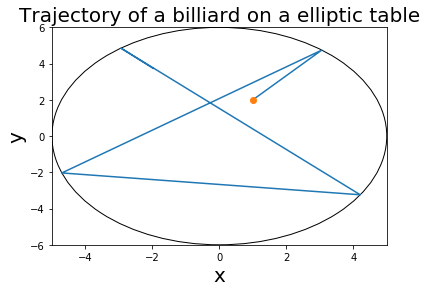

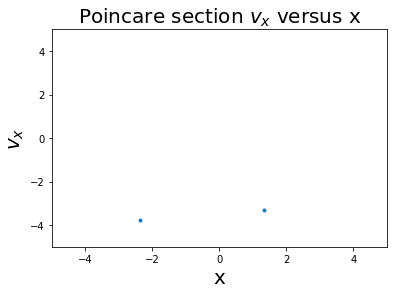

<Figure size 432x288 with 0 Axes>

In [51]:
my_plot()

Veuillez saisir les coordonnées horizontales et verticales x, y de la position initiale de la balle, les composantes horizontale et verticale vx, vy de la vitesse initiale de la balle, les demi-axes a et b de la longueur de l'ellipse et la durée t du mouvement, séparés par des espaces:
0.5 0.1 1 1 2 1 100

Les vitesses partielles horizontale et verticale de la balle sont respectivement： 1.0 1.0
Les demi-axes du mur de collision elliptique sont： 2.0 1.0
La durée totale de l'exercice est： 100.0
La distance totale parcourue est： 141.4213562373095


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


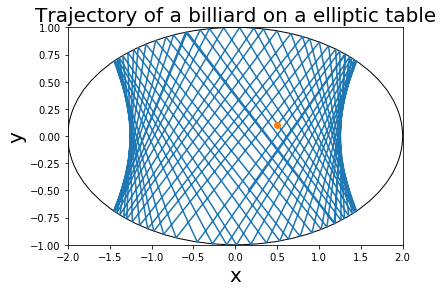

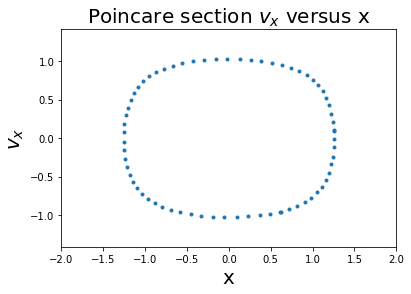

<Figure size 432x288 with 0 Axes>

In [52]:
my_plot()

Veuillez saisir les coordonnées horizontales et verticales x, y de la position initiale de la balle, les composantes horizontale et verticale vx, vy de la vitesse initiale de la balle, les demi-axes a et b de la longueur de l'ellipse et la durée t du mouvement, séparés par des espaces:
0.9 0.9 3 5 9 3 100

Les vitesses partielles horizontale et verticale de la balle sont respectivement： 3.0 5.0
Les demi-axes du mur de collision elliptique sont： 9.0 3.0
La durée totale de l'exercice est： 100.0
La distance totale parcourue est： 583.0951894845301


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


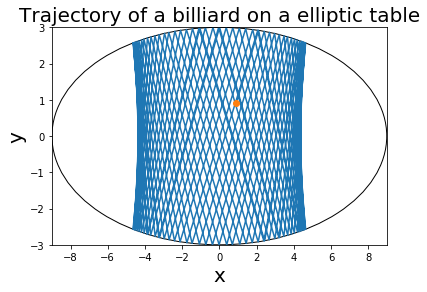

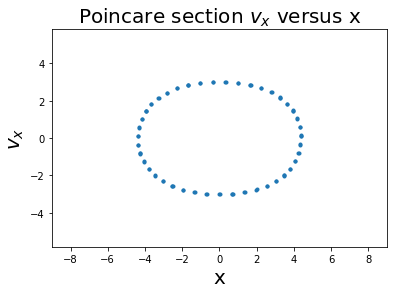

<Figure size 432x288 with 0 Axes>

In [53]:
my_plot()

Veuillez saisir les coordonnées horizontales et verticales x, y de la position initiale de la balle, les composantes horizontale et verticale vx, vy de la vitesse initiale de la balle, les demi-axes a et b de la longueur de l'ellipse et la durée t du mouvement, séparés par des espaces:
0 1 2 5 1 6 100

Les vitesses partielles horizontale et verticale de la balle sont respectivement： 2.0 5.0
Les demi-axes du mur de collision elliptique sont： 1.0 6.0
La durée totale de l'exercice est： 100.0
La distance totale parcourue est： 538.5164807134504


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


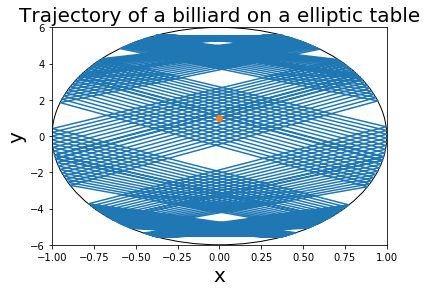

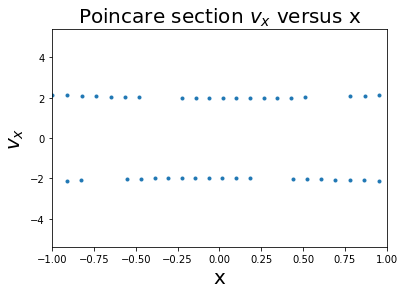

<Figure size 432x288 with 0 Axes>

In [54]:
my_plot()

Veuillez saisir les coordonnées horizontales et verticales x, y de la position initiale de la balle, les composantes horizontale et verticale vx, vy de la vitesse initiale de la balle, les demi-axes a et b de la longueur de l'ellipse et la durée t du mouvement, séparés par des espaces:
0.707106781 1.414213562 2 2 2 1.5 100

Les vitesses partielles horizontale et verticale de la balle sont respectivement： 2.0 2.0
Les demi-axes du mur de collision elliptique sont： 2.0 1.5
La durée totale de l'exercice est： 100.0
La distance totale parcourue est： 282.842712474619


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


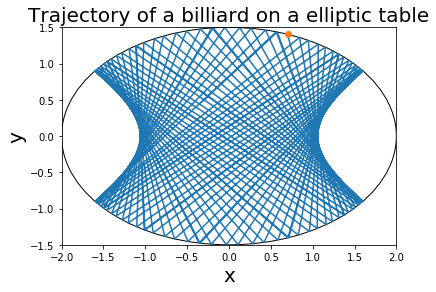

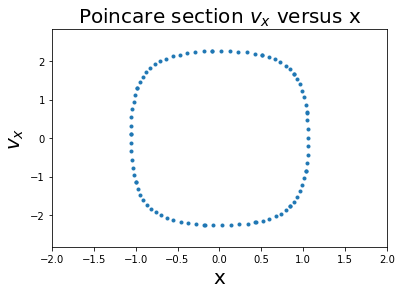

<Figure size 432x288 with 0 Axes>

In [72]:
my_plot()